In [1]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix

In [2]:

# Load digits data
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print original and reduced shapes
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (1797, 64)
Reduced shape: (1797, 2)


In [3]:

# Apply KMeans with 10 clusters (for digits 0–9)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate clustering
silhouette = silhouette_score(X_scaled, clusters)
ari = adjusted_rand_score(y, clusters)

# Print silhouette score and rand index
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")


Silhouette Score: 0.1356
Adjusted Rand Index: 0.5305


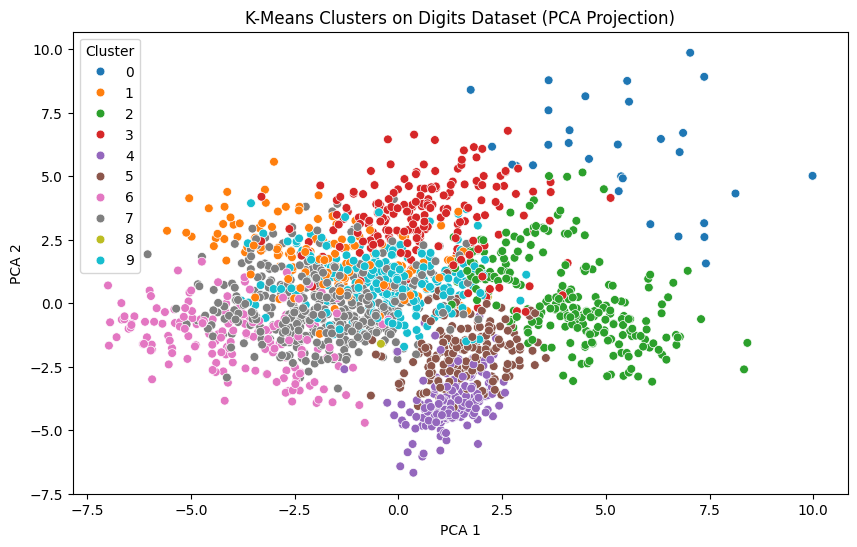

In [4]:

# Plot the clustered points in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10", s=40, legend="full")
plt.title("K-Means Clusters on Digits Dataset (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


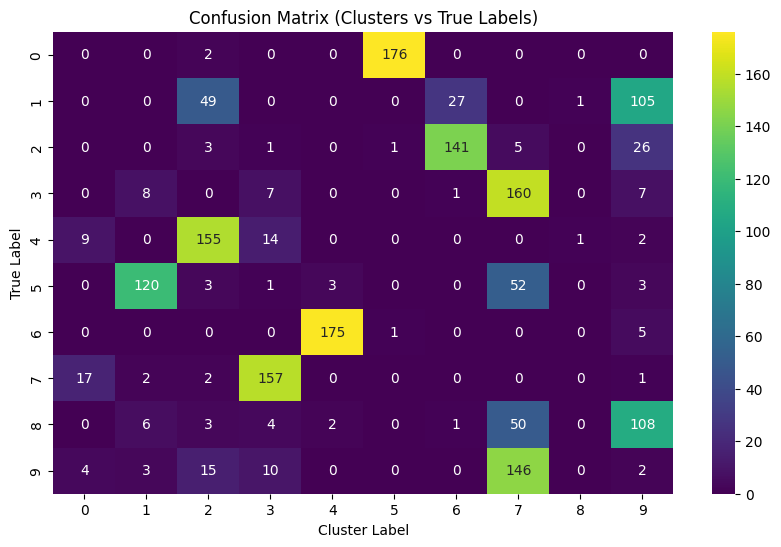

In [5]:

# Create confusion matrix comparing clusters to actual digits (optional)
conf_matrix = confusion_matrix(y, clusters)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix (Clusters vs True Labels)")
plt.xlabel("Cluster Label")
plt.ylabel("True Label")
plt.show()


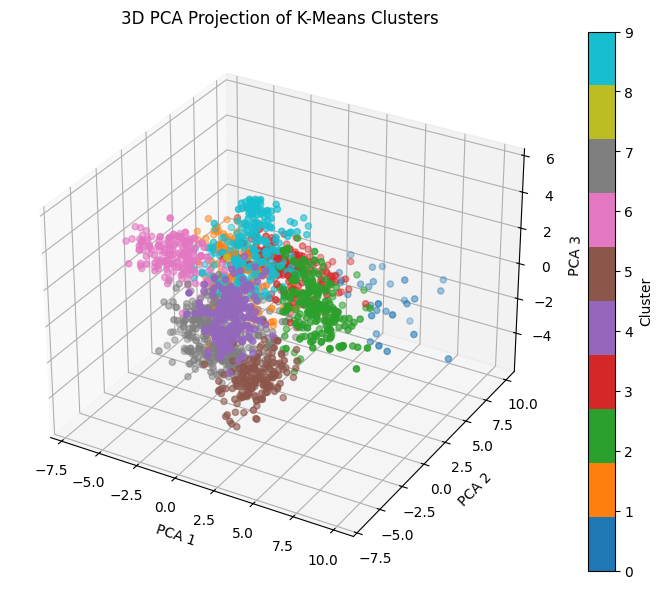

In [6]:

# 3D Visualization using PCA (3 components)
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='tab10', s=20)
ax.set_title("3D PCA Projection of K-Means Clusters")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, label='Cluster')
plt.show()
